In [52]:
import numpy as np
import pandas as pd
import os
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns # seaborn ref : https://greeksharifa.github.io/machine_learning/2019/12/05/Seaborn-Module/
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("2018_sel_KNN.csv") ## 파일리딩!
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7992 entries, 0 to 7991
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sex           7992 non-null   int64  
 1   age           7992 non-null   int64  
 2   incm5         7992 non-null   int64  
 3   edu           7992 non-null   int64  
 4   occp          7992 non-null   int64  
 5   wt_hs         7992 non-null   float64
 6   wt_vt         7992 non-null   float64
 7   wt_ntr        7992 non-null   float64
 8   cfam          7992 non-null   int64  
 9   DE1_pr        7992 non-null   int64  
 10  D_1_1         7992 non-null   int64  
 11  DI2_pr        7992 non-null   int64  
 12  DH4_pr        7992 non-null   int64  
 13  DH2_pr        7992 non-null   int64  
 14  DN1_pr        7992 non-null   int64  
 15  DJ0_pr        7992 non-null   int64  
 16  DKNaN_pr      7992 non-null   int64  
 17  MH1_yr        7992 non-null   int64  
 18  Total_slp_wk  7992 non-null 

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

## 데이터 분류 및 전처리
# 축 분리#te
y = df.DE1_pr # y축 설정
x = df.drop(columns=["DE1_pr"]) #결과축 삭제 for predictions

# 사이킷런 셋 분류 함수 : http://blog.naver.com/PostView.nhn?blogId=siniphia&logNo=221396370872
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42) ## test.size 0.2~0.25 설정할거임

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])

pipe.fit(x_train,y_train)
y_preds=pipe.predict(x_test)
pipe.score(x_test,y_test)


0.9412010008340284

In [50]:
## Scaling
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
print(standardScaler.fit(train_data))
train_data_standardScaled = standardScaler.transform(train_data)

NameError: name 'train_data' is not defined

In [3]:
t=df.corr(method='pearson') ## de1_pr 현재 당뇨병 유병 여부와 상관관계가 있는 변수들
t.DE1_pr ## 각 변수들간의 pearson 상관계수 정렬 p>0.1  -> age, ho_incm, cfam, genertnm 

sex             0.027594
age             0.255685
incm5          -0.037527
edu            -0.083122
occp            0.086016
wt_hs          -0.028454
wt_vt          -0.020289
wt_ntr         -0.082366
cfam           -0.169903
DE1_pr          1.000000
D_1_1           0.156573
DI2_pr          0.255281
DH4_pr          0.010078
DH2_pr          0.096608
DN1_pr          0.067793
DJ0_pr         -0.039949
DKNaN_pr        0.013413
MH1_yr         -0.038203
Total_slp_wk    0.002853
HE_ht           0.037151
HE_wc           0.183686
HE_BMI          0.133493
HE_obe          0.089818
HE_usg         -0.023390
HE_hcv          0.028079
N_WAT_C        -0.000063
N_INTK         -0.034735
N_CHOL         -0.081070
N_SUGAR        -0.064480
N_CA           -0.017804
N_VA           -0.014680
N_VITC         -0.009985
ainc           -0.131436
N_MUFA         -0.086560
N_WATER        -0.018243
N_PUFA         -0.050090
N_N3           -0.002118
N_TDF           0.065398
N_FE            0.012563
N_CAROT         0.016250


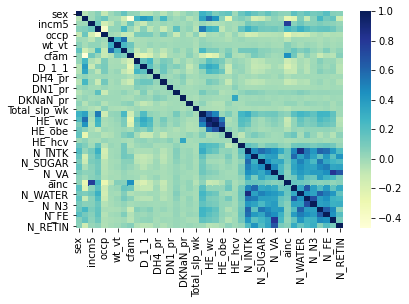

In [4]:
sns.heatmap(df.corr(),cmap="YlGnBu")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BF69C457C0>,
      dtype=object)

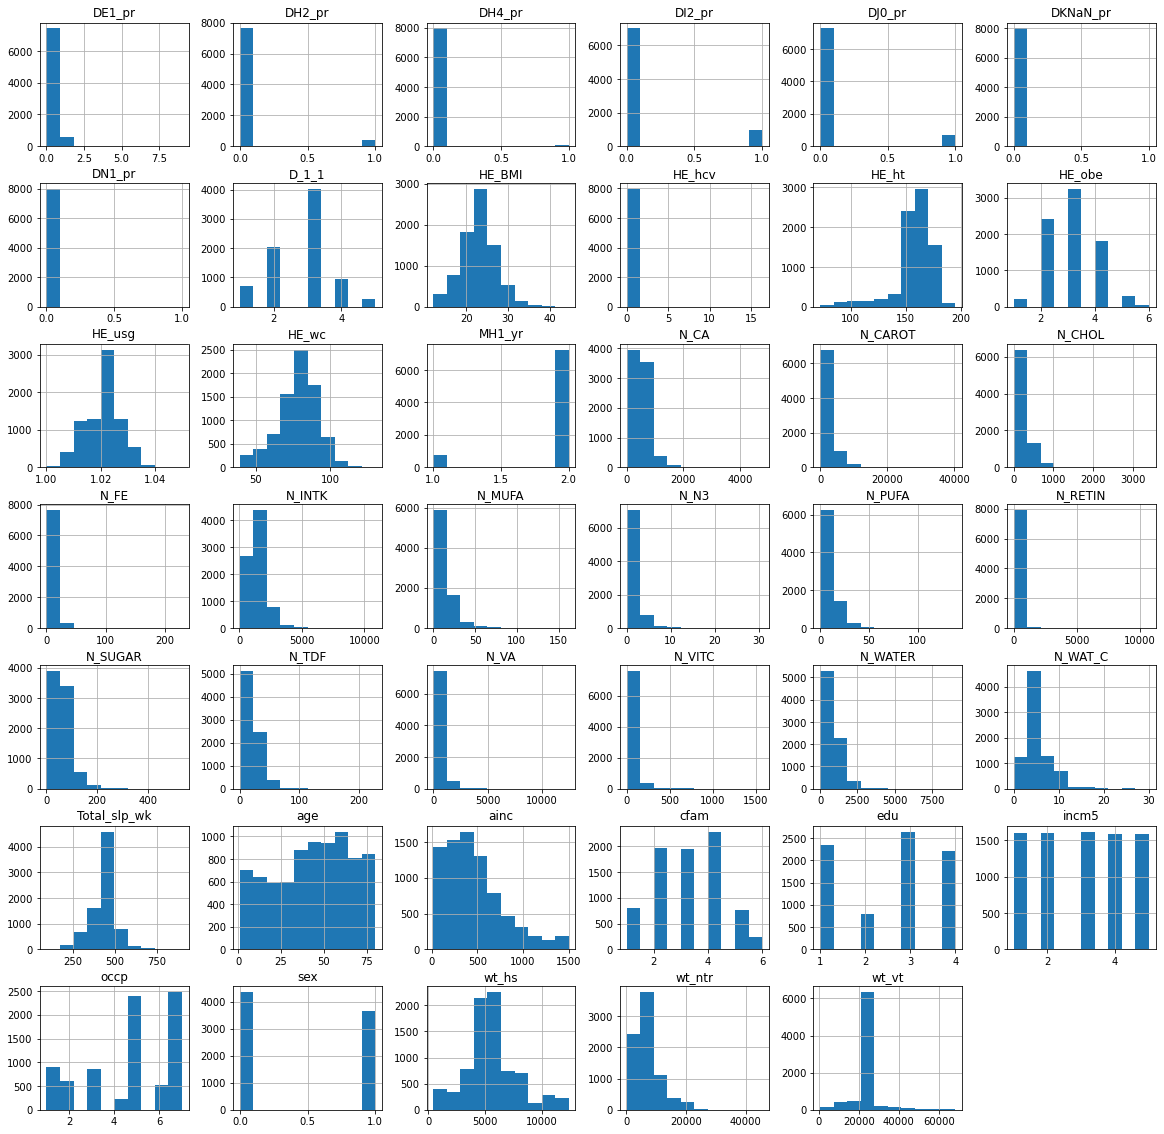

In [5]:
df.hist(figsize=(20,20))#histogram plotting

In [39]:
## 데이터 분류 및 전처리
# 축 분리#te
y = df.DE1_pr # y축 설정
x = df.drop(columns=["DE1_pr"]) #결과축 삭제 for predictions

# 사이킷런 셋 분류 함수 : http://blog.naver.com/PostView.nhn?blogId=siniphia&logNo=221396370872
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42) ## test.size 0.2~0.25 설정할거임

In [40]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test =scaler.transform(x_test)

0.9416180150125104


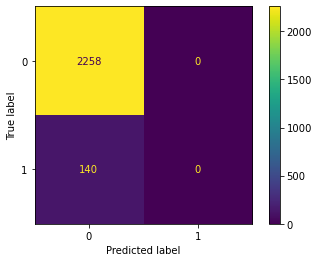

In [41]:
## Random Forest model
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0,
                                   max_features = 'auto', max_depth = 10)
ranfor.fit(x_train, y_train)
pred_ranfor = ranfor.predict(x_test)
print(accuracy_score(y_test, pred_ranfor))
plot_confusion_matrix(ranfor, x_test, y_test)

0.9343339587242027


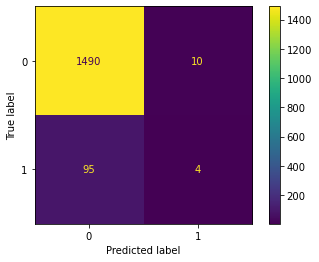

In [34]:
## Support Vector machine - 오래걸림;;;
from sklearn import svm
sv = svm.SVC(kernel='linear')
sv.fit(x_train, y_train)
pred_svm = sv.predict(x_test)
print(accuracy_score(y_test, pred_svm))
plot_confusion_matrix(sv, x_test, y_test)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 DE1_pr   No. Observations:                 5594
Model:                            GLM   Df Residuals:                     5554
Model Family:                Binomial   Df Model:                           39
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                   -inf
Date:                Thu, 12 Nov 2020   Deviance:                       3401.8
Time:                        12:43:34   Pearson chi2:                 4.36e+03
No. Iterations:                    14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3613      0.178      2.032      0.0

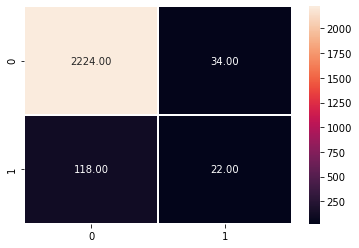

In [42]:
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
import statsmodels.stats.tests.test_influence
## 일반화 선형모형 : https://rstudio-pubs-static.s3.amazonaws.com/41074_62aa52bdc9ff48a2ba3fb0f468e19118.html
res = GLM(y_train, x_train,
          family=families.Binomial()).fit(attach_wls=True, atol=1e-10) 
print(res.summary())
pred = np.array(res.predict(x_test), dtype=float)
table = np.histogram2d(y_test, pred, bins=2)[0]
table
print("Statmodel Acc : ", (table[0,0] + table[1,1])/(table[0,0] + table[1,1]+table[1,0] + table[0,1]))
ax = sns.heatmap(table, linewidth=0.5,fmt=".2f",annot=True)
plt.show()
#plot_confusion_matrix(pred, x_test, y_test)

{'learn': {'MultiClass': 0.43579831319117596}, 'validation': {'AUC:type=Mu': 0.2941301907968575, 'MultiClass': 0.4221079415342027}}
[[1500.    0.    0.]
 [  99.    0.    0.]
 [   0.    0.    0.]]


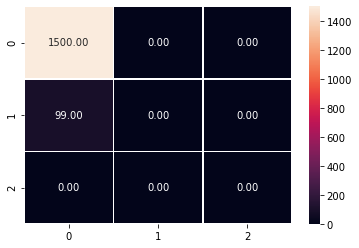

catboost Acc :  0.9380863039399625


In [38]:
from catboost import CatBoostClassifier, Pool
from catboost.utils import get_confusion_matrix

eval_dataset = Pool(x_test,
                    y_test)

model = CatBoostClassifier(learning_rate=0.0001,
                           eval_metric='AUC')

model.fit(x_train,
          y_train,
          eval_set=eval_dataset,
          verbose=False)

print(model.get_best_score())
cm = get_confusion_matrix(model, eval_dataset)
print(cm)
predict_accuracy_on_test_set = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1]+cm[1,0] + cm[0,1])
ax = sns.heatmap(cm, linewidth=0.5,fmt=".2f",annot=True)
plt.show()
print("catboost Acc : ", predict_accuracy_on_test_set)